In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist, mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [8]:
from tensorflow.keras.models import Model

In [9]:
from tensorflow.keras.layers import Dense,Input

In [10]:
# This is our input layer
input_img = Input(shape=(784,))

In [11]:
# "encoded" is the encoded output of the input
encoded = Dense(64, activation='relu')(input_img)

In [12]:
# "decoded" is the recreated images from the encoded - this is a layer
decoded = Dense(784, activation='sigmoid')(encoded)

In [13]:
# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [14]:
encoder = Model(input_img, encoded)

In [15]:
# 64 neuron input layer for the Decoder
encoded_input = Input(shape=(64,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [16]:
autoencoder.compile(optimizer='rmsprop', 
                    loss='binary_crossentropy')

In [17]:
autoencoder.fit(X_train, X_train,
                epochs=20,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/20
1875/1875 [==============================] - 11s 3ms/step - loss: 0.3134 - val_loss: 0.2887
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2837 - val_loss: 0.2878
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2784 - val_loss: 0.2777
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2760 - val_loss: 0.2785
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2747 - val_loss: 0.2765
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2739 - val_loss: 0.2760
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2734 - val_loss: 0.2751
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - val_loss: 0.2744
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2727 - val_loss: 0.2746
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.27

In [18]:
# We will use the X_test and the encoder model to Encode the images
encoded_imgs = encoder.predict(X_test)

In [19]:
decoded_imgs = decoder.predict(encoded_imgs) # Use the decoder model to decode the encoded images

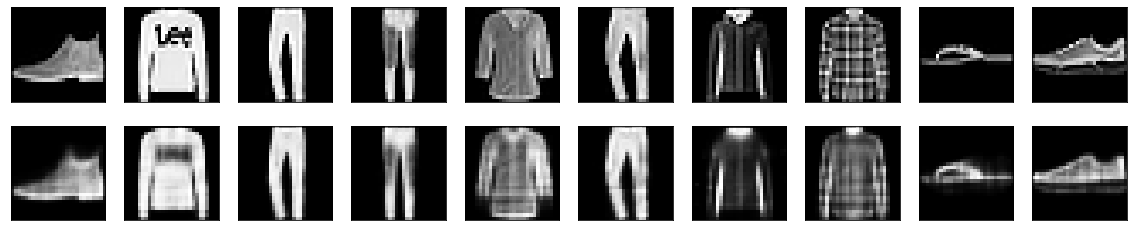

In [20]:
import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [22]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


In [23]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________
